In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
import keras.applications.efficientnet
from keras.applications.efficientnet import EfficientNetB7
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import LeakyReLU
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.efficientnet import EfficientNetB7
from keras.applications.efficientnet_v2 import EfficientNetV2L
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.densenet import DenseNet121
from keras.applications.resnet import ResNet50

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
tf.__version__

'2.9.3'

In [4]:
data_base_train_folder = 'd:/Dane/retinaldiseaseclassification/prepared/ARMD/Train'
data_base_valid_folder = 'd:/Dane/retinaldiseaseclassification/prepared/ARMD/Validate'
data_base_test_folder = 'd:/Dane/retinaldiseaseclassification/prepared/ARMD/Test'

In [5]:
training_workspace_folder = "d:/Dane/retinaldiseaseclassification/prepared/workspace/"

In [6]:
def create_model_from_vgg16():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [7]:
def create_model_from_inceptionV3():
    inceptionV3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in inceptionV3.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        inceptionV3,
        BatchNormalization(),
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [8]:
def create_model_from_inceptionV3_B():
    inceptionV3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in inceptionV3.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        inceptionV3,
        #BatchNormalization(),
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),        
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [9]:
def create_model_from_inceptionV3_D():
    inceptionV3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in inceptionV3.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        inceptionV3,
        BatchNormalization(),
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),        
        Dense(16),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),        
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [10]:
def create_model_from_inceptionV3_C():
    inceptionV3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in inceptionV3.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        inceptionV3,
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [11]:
def create_model_from_efficientnet_B():
    base_model = EfficientNetB7(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model    

In [12]:
def create_model_from_efficientnet_C():
    base_model = EfficientNetB7(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model  

In [13]:
def create_model_from_InceptionResNetV2_A():
    base_model = InceptionResNetV2(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [14]:
def create_model_from_VGG19_A():
    base_model = VGG19(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [15]:
def create_model_from_VGG19_B():
    base_model = VGG19(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(1024),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [16]:
def create_model_from_VGG19_C():
    base_model = VGG19(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(16, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [17]:
def create_model_from_EfficientNetV2L_A():
    base_model = EfficientNetV2L(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(16, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [18]:
def create_model_from_EfficientNetV2L_B():
    base_model = EfficientNetV2L(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(1024, activation="relu"),
        Dropout(0.2),
        Dense(512, activation="relu"),
        Dropout(0.2),
        Dense(256, activation="relu"),
        Dropout(0.2),
        Dense(16, activation="relu"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [19]:
def create_model_from_EfficientNetV2L_C():
    base_model = EfficientNetV2L(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(2048, activation="sigmoid"),
        Dropout(0.2),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [20]:
def create_model_from_vgg16_B():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [21]:
def create_model_from_vgg16_C():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [22]:
def create_model_from_efficientnet_D():
    base_model = EfficientNetB7(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [23]:
def create_model_from_efficientnet_E():
    base_model = EfficientNetB7(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [24]:
def create_model_from_vgg16_D():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [25]:
def create_model_from_vgg16_E():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    vgg16.layers[-1].trainable = True
    vgg16.layers[-2].trainable = True
    vgg16.layers[-3].trainable = True
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [26]:
def create_model_from_vgg16_E():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    vgg16.layers[-1].trainable = True
    vgg16.layers[-2].trainable = True
    vgg16.layers[-3].trainable = True
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [27]:
def create_model_from_vgg16_F():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))

    for layer in vgg16.layers:
        layer.trainable = False

    new_model = tf.keras.models.Sequential([
        vgg16,
        Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"),
        Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"),
        #Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"),
        MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        Flatten(),    
        BatchNormalization(),
        #Dense(1024, activation="sigmoid"),
        #Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])

    return new_model

In [28]:
def create_model_from_vgg16_G():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))

    for layer in vgg16.layers:
        layer.trainable = False

    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(4096, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])

    return (new_model, keras.applications.vgg16.preprocess_input)

In [29]:
def create_model_from_ResNet152V2_A():
    base_model = ResNet152V2(include_top=False, weights='imagenet', input_shape=(224, 224,3))

    for layer in base_model.layers:
        layer.trainable = False

    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])

    return (new_model, keras.applications.resnet_v2.preprocess_input)

In [30]:
def create_model_from_efficientnet_C():
    base_model = EfficientNetB7(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return (new_model, keras.applications.efficientnet_v2.preprocess_input)

In [31]:
def create_model_from_DenseNet121_C():
    base_model = DenseNet121(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        GlobalAveragePooling2D(),  
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])
    
    return (new_model, keras.applications.densenet.preprocess_input)

In [32]:
def create_model_from_DenseNet121_D():
    base_model = DenseNet121(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),    
        BatchNormalization(),
        Dense(4096, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return (new_model, keras.applications.densenet.preprocess_input)

In [33]:
def create_model_from_ResNet50_A():
    base_model = ResNet50(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return (new_model, keras.applications.resnet.preprocess_input)

In [34]:
checkpointer = ModelCheckpoint(filepath = training_workspace_folder +'best_val_loss_weights.h5', verbose = 1, monitor = 'val_loss', mode = 'auto', save_best_only = True) #save at each epoch if the validation decreased
checkpointer2 = ModelCheckpoint(filepath = training_workspace_folder +'best_accuracy_weights.h5', verbose = 1, monitor = 'accuracy', mode = 'auto', save_best_only = True) #save at each epoch if the validation decreased
checkpointer3 = ModelCheckpoint(filepath = training_workspace_folder +'best_val_accuracy_weights.h5', verbose = 1, monitor = 'val_accuracy', mode = 'auto', save_best_only = True) #save at each epoch if the validation decreased

In [35]:
(model, selected_preprocessing_function) = create_model_from_ResNet50_A()

In [36]:
selected_preprocessing_function

<function keras.applications.resnet.preprocess_input(x, data_format=None)>

In [37]:
train_generator = ImageDataGenerator(
    zoom_range=[0.8, 1.2],
    rotation_range = 90.0,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    preprocessing_function = selected_preprocessing_function
).flow_from_directory(
    directory = data_base_train_folder,
    class_mode = 'categorical',
    target_size = (224,224),
    classes = ['ARMD0', 'ARMD1'],
    batch_size = 32)

Found 1920 images belonging to 2 classes.


In [38]:
validation_generator = ImageDataGenerator(
    zoom_range=[0.8, 1.2],
    rotation_range = 90.0,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    preprocessing_function = selected_preprocessing_function
).flow_from_directory(
    directory = data_base_valid_folder,
    class_mode = 'categorical',
    target_size = (224,224),
    classes = ['ARMD0', 'ARMD1'],
    batch_size = 32)

Found 640 images belonging to 2 classes.


In [39]:
test_generator = ImageDataGenerator(
    preprocessing_function = selected_preprocessing_function
).flow_from_directory(
    directory = data_base_test_folder,
    class_mode = 'categorical',
    target_size = (224,224),
    classes = ['ARMD0', 'ARMD1'],
    batch_size = 32)

Found 640 images belonging to 2 classes.


In [40]:
def scheduler_I(epoch, lr):
    if epoch < 10:
        return 0.001
    
    if epoch < 20:
        return 0.0005
    
    if epoch < 50:
        return 0.0001
    
    return 0.00005

In [41]:
def scheduler_II(epoch, lr):
    if epoch < 10:
        return 0.001
    
    if epoch < 20:
        return 0.0001
    
    if epoch < 50:
        return 0.00001
    
    return 0.000005

In [42]:
learning_rate_scheduler_callback = LearningRateScheduler(scheduler_I)

In [43]:
csv_logger = CSVLogger('d:/Dane/retinaldiseaseclassification/prepared/workspace/training.log')

In [44]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
json_string = model.to_json()
open(training_workspace_folder + 'TL_model_architecture.json', 'w').write(json_string)
history = model.fit_generator(
    train_generator,
    validation_data = validation_generator,
    epochs = 100,
    callbacks = [checkpointer, checkpointer2, checkpointer3, learning_rate_scheduler_callback, csv_logger]
)

C:\Users\ax\AppData\Local\Temp\ipykernel_10924\1785077291.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
60/60 [==============================] - ETA: 0s - loss: 0.2363 - accuracy: 0.9469
Epoch 1: val_loss improved from inf to 0.21851, saving model to d:/Dane/retinaldiseaseclassification/prepared/workspace\best_val_loss_weights.h5

Epoch 1: accuracy improved from -inf to 0.94687, saving model to d:/Dane/retinaldiseaseclassification/prepared/workspace\best_accuracy_weights.h5

Epoch 1: val_accuracy improved from -inf to 0.94063, saving model to d:/Dane/retinaldiseaseclassification/prepared/workspace\best_val_accuracy_weights.h5
60/60 [==============================] - 228s 4s/step - loss: 0.2363 - accuracy: 0.9469 - val_loss: 0.2185 - val_accuracy: 0.9406 - lr: 0.0010
Epoch 2/100
60/60 [==============================] - ETA: 0s - loss: 0.1922 - accuracy: 0.9474
Epoch 2: val_loss did not improve from 0.21851

Epoch 2: accuracy improved from 0.94687 to 0.94740, saving model to d:/Dane/retinaldiseaseclassification/prepared/workspace\best_accuracy_weights.h5

Epoch 2: val_accuracy 

60/60 [==============================] - ETA: 0s - loss: 0.1483 - accuracy: 0.9531
Epoch 18: val_loss did not improve from 0.17152

Epoch 18: accuracy improved from 0.95156 to 0.95312, saving model to d:/Dane/retinaldiseaseclassification/prepared/workspace\best_accuracy_weights.h5

Epoch 18: val_accuracy did not improve from 0.94844
60/60 [==============================] - 200s 3s/step - loss: 0.1483 - accuracy: 0.9531 - val_loss: 0.1763 - val_accuracy: 0.9391 - lr: 5.0000e-04
Epoch 19/100
60/60 [==============================] - ETA: 0s - loss: 0.1495 - accuracy: 0.9505
Epoch 19: val_loss improved from 0.17152 to 0.16110, saving model to d:/Dane/retinaldiseaseclassification/prepared/workspace\best_val_loss_weights.h5

Epoch 19: accuracy did not improve from 0.95312

Epoch 19: val_accuracy did not improve from 0.94844
60/60 [==============================] - 201s 3s/step - loss: 0.1495 - accuracy: 0.9505 - val_loss: 0.1611 - val_accuracy: 0.9438 - lr: 5.0000e-04
Epoch 20/100
60/60 [===


Epoch 35: val_accuracy did not improve from 0.95156
60/60 [==============================] - 197s 3s/step - loss: 0.1379 - accuracy: 0.9563 - val_loss: 0.1809 - val_accuracy: 0.9438 - lr: 1.0000e-04
Epoch 36/100
60/60 [==============================] - ETA: 0s - loss: 0.1256 - accuracy: 0.9557
Epoch 36: val_loss did not improve from 0.14866

Epoch 36: accuracy did not improve from 0.95885

Epoch 36: val_accuracy did not improve from 0.95156
60/60 [==============================] - 197s 3s/step - loss: 0.1256 - accuracy: 0.9557 - val_loss: 0.1635 - val_accuracy: 0.9484 - lr: 1.0000e-04
Epoch 37/100
60/60 [==============================] - ETA: 0s - loss: 0.1279 - accuracy: 0.9578
Epoch 37: val_loss did not improve from 0.14866

Epoch 37: accuracy did not improve from 0.95885

Epoch 37: val_accuracy did not improve from 0.95156
60/60 [==============================] - 198s 3s/step - loss: 0.1279 - accuracy: 0.9578 - val_loss: 0.1686 - val_accuracy: 0.9453 - lr: 1.0000e-04
Epoch 38/100
6

60/60 [==============================] - 198s 3s/step - loss: 0.1218 - accuracy: 0.9578 - val_loss: 0.1620 - val_accuracy: 0.9484 - lr: 5.0000e-05
Epoch 56/100
60/60 [==============================] - ETA: 0s - loss: 0.1221 - accuracy: 0.9578
Epoch 56: val_loss did not improve from 0.14857

Epoch 56: accuracy did not improve from 0.96042

Epoch 56: val_accuracy did not improve from 0.95156
60/60 [==============================] - 198s 3s/step - loss: 0.1221 - accuracy: 0.9578 - val_loss: 0.1582 - val_accuracy: 0.9438 - lr: 5.0000e-05
Epoch 57/100
60/60 [==============================] - ETA: 0s - loss: 0.1299 - accuracy: 0.9531
Epoch 57: val_loss did not improve from 0.14857

Epoch 57: accuracy did not improve from 0.96042

Epoch 57: val_accuracy did not improve from 0.95156
60/60 [==============================] - 198s 3s/step - loss: 0.1299 - accuracy: 0.9531 - val_loss: 0.1801 - val_accuracy: 0.9406 - lr: 5.0000e-05
Epoch 58/100
60/60 [==============================] - ETA: 0s - los

60/60 [==============================] - ETA: 0s - loss: 0.1173 - accuracy: 0.9594
Epoch 75: val_loss did not improve from 0.13967

Epoch 75: accuracy did not improve from 0.96302

Epoch 75: val_accuracy did not improve from 0.95469
60/60 [==============================] - 198s 3s/step - loss: 0.1173 - accuracy: 0.9594 - val_loss: 0.1430 - val_accuracy: 0.9516 - lr: 5.0000e-05
Epoch 76/100
60/60 [==============================] - ETA: 0s - loss: 0.1207 - accuracy: 0.9563
Epoch 76: val_loss did not improve from 0.13967

Epoch 76: accuracy did not improve from 0.96302

Epoch 76: val_accuracy did not improve from 0.95469
60/60 [==============================] - 198s 3s/step - loss: 0.1207 - accuracy: 0.9563 - val_loss: 0.1687 - val_accuracy: 0.9422 - lr: 5.0000e-05
Epoch 77/100
60/60 [==============================] - ETA: 0s - loss: 0.1110 - accuracy: 0.9630
Epoch 77: val_loss did not improve from 0.13967

Epoch 77: accuracy did not improve from 0.96302

Epoch 77: val_accuracy did not im

60/60 [==============================] - ETA: 0s - loss: 0.1115 - accuracy: 0.9630
Epoch 95: val_loss did not improve from 0.13967

Epoch 95: accuracy did not improve from 0.96354

Epoch 95: val_accuracy did not improve from 0.96094
60/60 [==============================] - 198s 3s/step - loss: 0.1115 - accuracy: 0.9630 - val_loss: 0.1586 - val_accuracy: 0.9469 - lr: 5.0000e-05
Epoch 96/100
60/60 [==============================] - ETA: 0s - loss: 0.1162 - accuracy: 0.9552
Epoch 96: val_loss did not improve from 0.13967

Epoch 96: accuracy did not improve from 0.96354

Epoch 96: val_accuracy did not improve from 0.96094
60/60 [==============================] - 197s 3s/step - loss: 0.1162 - accuracy: 0.9552 - val_loss: 0.1584 - val_accuracy: 0.9469 - lr: 5.0000e-05
Epoch 97/100
60/60 [==============================] - ETA: 0s - loss: 0.1144 - accuracy: 0.9609
Epoch 97: val_loss did not improve from 0.13967

Epoch 97: accuracy did not improve from 0.96354

Epoch 97: val_accuracy did not im

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1024)              102761472 
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                        

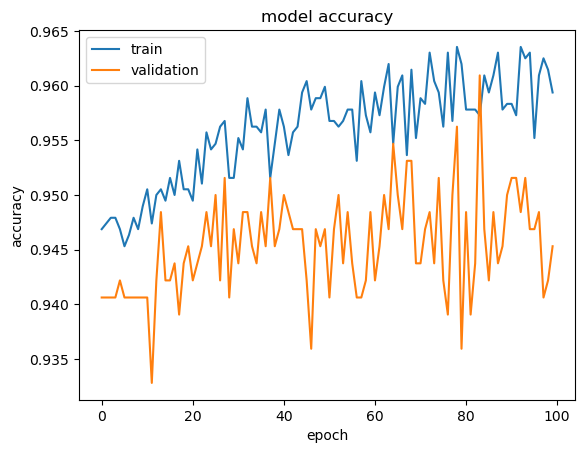

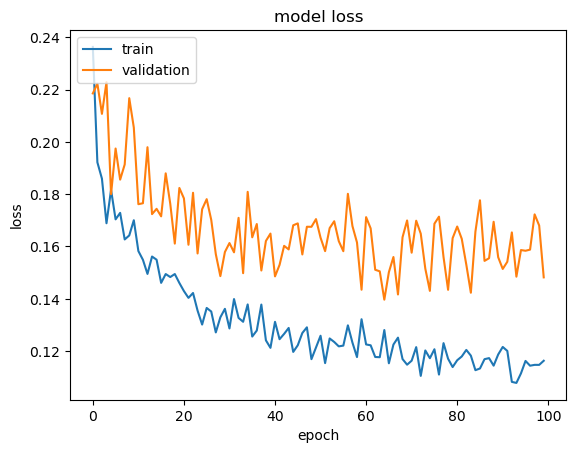

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [47]:
scoreSeg = model.evaluate_generator(test_generator)

C:\Users\ax\AppData\Local\Temp\ipykernel_10924\922298055.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scoreSeg = model.evaluate_generator(test_generator)


In [94]:
scoreSeg

[0.14393138885498047, 0.953125]

In [48]:
model.metrics_names

['loss', 'accuracy']

In [49]:
best_model = keras.models.load_model('d:/Dane/retinaldiseaseclassification/prepared/workspace/ARMD-1-ResNet50-96354-96094-100-epochs/best_val_accuracy_weights.h5')

In [50]:
scoreSeg = best_model.evaluate_generator(test_generator)

C:\Users\ax\AppData\Local\Temp\ipykernel_10924\2501077764.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scoreSeg = best_model.evaluate_generator(test_generator)


In [51]:
scoreSeg

[0.13191711902618408, 0.953125]

In [52]:
y_true = test_generator.classes

In [59]:
y_true.shape

(640,)

In [54]:
probabilities = best_model.predict_generator(test_generator)

C:\Users\ax\AppData\Local\Temp\ipykernel_10924\2451701115.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  probabilities = best_model.predict_generator(test_generator)


In [58]:
probabilities

array([[0.96768683, 0.03231322],
       [0.99487346, 0.00512651],
       [0.2911166 , 0.70888335],
       ...,
       [0.9870129 , 0.01298706],
       [0.9885372 , 0.01146286],
       [0.99681854, 0.00318138]], dtype=float32)

In [57]:
y_pred = (probabilities > 0.5).asint()

AttributeError: 'numpy.ndarray' object has no attribute 'asint'

In [56]:
y_pred

array([[ True, False],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [ True, False],
       [ True, False]])